In [ ]:
#Scores of the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
df = pd.read_csv("cleaned_csv (1).csv")

/tmp/ipython-input-4-2228509830.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_csv (1).csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42040 entries, 0 to 42039
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  42040 non-null  int64  
 1   score                       42040 non-null  object 
 2   assessment_type             42040 non-null  object 
 3   weight                      42040 non-null  float64
 4   gender                      42040 non-null  object 
 5   region                      42040 non-null  object 
 6   highest_education           42039 non-null  object 
 7   imd_band                    42039 non-null  object 
 8   age_band                    42039 non-null  object 
 9   num_of_prev_attempts        42039 non-null  float64
 10  studied_credits             42039 non-null  float64
 11  disability                  42039 non-null  object 
 12  final_result                42039 non-null  object 
 13  date_registration           420

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("filename.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492484 entries, 0 to 1492483
Data columns (total 24 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id_assessment               1492484 non-null  int64  
 1   id_student                  1492484 non-null  int64  
 2   date_submitted              1492484 non-null  int64  
 3   is_banked                   1492484 non-null  int64  
 4   score                       1491201 non-null  float64
 5   code_module                 1492484 non-null  object 
 6   code_presentation           1492484 non-null  object 
 7   assessment_type             1492484 non-null  object 
 8   date                        1469058 non-null  float64
 9   weight                      1492484 non-null  float64
 10  gender                      1492484 non-null  object 
 11  region                      1492484 non-null  object 
 12  highest_education           1492484 non-null  object 
 1

In [ ]:
df1['id_student'].nunique()

23369

In [ ]:
#unique values in each column
for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'id_assessment': [ 1752  1753  1754  1755  1756  1758  1759  1760  1761  1762 14984 14985
 14986 14987 14988 14989 14991 14992 14993 14994 14995 14996 14997 14998
 14999 15000 15001 15003 15004 15005 15006 15007 15008 15009 15010 15011
 15012 15013 15015 15016 15017 15018 15019 15020 15021 15022 15023 15024
 24282 24283 24284 24285 24286 24287 24288 24289 24290 24291 24292 24293
 24294 24295 24296 24297 24298 24299 25334 25335 25336 25337 25338 25339
 25340 25341 25342 25343 25344 25345 25346 25347 25348 25349 25350 25351
 25352 25353 25354 25355 25356 25357 25358 25359 25360 25361 25362 25363
 25364 25365 25366 25367 25368 30709 30710 30711 30712 30714 30715 30716
 30717 30719 30720 30721 30722 34860 34861 34862 34863 34864 34865 34866
 34867 34868 34869 34870 34871 34873 34874 34875 34876 34877 34878 34879
 34880 34881 34882 34883 34884 34886 34887 34888 34889 34890 34891 34892
 34893 34894 34895 34896 34897 34899 34900 34901 34902 34903 34904 34905
 34906 349

In [ ]:
df['disability'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df = df1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
import csv
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492484 entries, 0 to 1492483
Data columns (total 24 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id_assessment               1492484 non-null  int64  
 1   id_student                  1492484 non-null  int64  
 2   date_submitted              1492484 non-null  int64  
 3   is_banked                   1492484 non-null  int64  
 4   score                       1491201 non-null  float64
 5   code_module                 1492484 non-null  object 
 6   code_presentation           1492484 non-null  object 
 7   assessment_type             1492484 non-null  object 
 8   date                        1469058 non-null  float64
 9   weight                      1492484 non-null  float64
 10  gender                      1492484 non-null  object 
 11  region                      1492484 non-null  object 
 12  highest_education           1492484 non-null  object 
 1

#Above is the scores before data cleaning

In [ ]:
'''# Define expected columns
expected_columns = [
    'id_student', 'score', 'assessment_type', 'weight', 'gender', 'region',
    'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
    'studied_credits', 'disability', 'final_result', 'date_registration',
    'activity_type', 'sum_click', 'module_presentation_length', 'course_id',
    'days_late'
]

def load_csv_robust(file_path):
    """Load CSV with error handling, skipping bad lines."""
    try:
        df = pd.read_csv(
            file_path,
            quoting=csv.QUOTE_ALL,
            on_bad_lines='skip',
            names=expected_columns,
            skiprows=1,
            encoding='utf-8'
        )
        print(f"Loaded {len(df)} rows successfully.")
        return df
    except Exception as e:
        print(f"Error loading CSV: {e}")
        valid_rows = []
        with open(file_path, 'r', encoding='utf-8') as file:
            reader = csv.reader(file, quoting=csv.QUOTE_ALL)
            header = next(reader)
            for i, row in enumerate(reader, 2):
                if len(row) == len(expected_columns):
                    valid_rows.append(row)
                else:
                    print(f"Skipped line {i}: {len(row)} fields (expected {len(expected_columns)})")
        if valid_rows:
            df = pd.DataFrame(valid_rows, columns=expected_columns)
            print(f"Loaded {len(df)} valid rows after manual filtering.")
            return df
        raise ValueError("No valid rows found in CSV.")

# Load the dataset
df = load_csv_robust("cleaned_csv (1).csv")'''

In [ ]:
#drop column unregistration
df = df.drop('date_unregistration', axis=1)

In [ ]:
df['days_late'] = df['date_submitted'] - df['date']  # Simple numeric subtraction

df['registration_lag'] = -df['date_registration']  # Convert to positive days

In [ ]:
#Drop 2 columns
df = df.drop(['date_submitted', 'date'], axis=1)

In [ ]:
df = df.drop(['is_banked'], axis=1)

In [ ]:
df['course_id'] = df['code_module'] + '_' + df['code_presentation']

In [ ]:
df = df.drop(['code_module', 'code_presentation'], axis=1)

In [ ]:
df['imd_band'] = df['imd_band'].replace('10-20', '10-20%').fillna('Unknown')
df['score'] = df.groupby('assessment_type')['score'].transform(lambda x: x.fillna(x.median()))
df['activity_type'] = df['activity_type'].fillna('No_activity')
df['sum_click'] = df['sum_click'].fillna(0)

In [ ]:
df.isna().sum()

,0
id_assessment,0
id_student,0
score,0
assessment_type,0
weight,0
gender,0
region,0
highest_education,0
imd_band,0
age_band,0


In [ ]:
df.shape

(1492436, 22)

In [ ]:
# 1. Volume of nulls
null_count = df['date_registration'].isnull().sum()
print(f"Null registration dates: {null_count} ({null_count/len(df):.1%})")

# 2. Correlation with outcomes
print("\nFailure rates by registration null status:")
print(pd.crosstab(
    df['date_registration'].isnull(),
    df['final_result'],
    normalize='index'
))

# 3. Check temporal patterns
if 'code_presentation' in df.columns:
    print("\nNulls by course presentation:")
    print(df.groupby('code_presentation')['date_registration'].apply(lambda x: x.isnull().mean()))

Null registration dates: 48 (0.0%)

Failure rates by registration null status:
final_result       Distinction      Fail      Pass  Withdrawn
date_registration                                            
False                 0.159465  0.149979  0.623487    0.06707
True                  0.000000  0.000000  0.000000    1.00000


In [ ]:
# Convert to binary flag instead of imputing
df['missing_registration'] = df['date_registration'].isnull().astype(int)

# Optional: Fill nulls with arbitrary value (since flag captures the signal)
df['registration_lag'] = df['registration_lag'].fillna(-999)

In [ ]:
#Drop records with date_registration = 0
df = df[df['date_registration'].notna()]

In [ ]:
df['final_result'].unique()
# Mapping for standardizing final_result
result_mapping = {
    'Distinction': 0, 'Fail': 1, 'Pass': 2, 'Withdrawn': 3,
}

In [ ]:
print(df[df['days_late'].isnull()][['date_submitted', 'date']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 23426 entries, 397766 to 771890
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_submitted  23426 non-null  int64  
 1   date            0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 549.0 KB
None


In [ ]:
df['days_late'].fillna(0, inplace=True)

In [ ]:
# Standardize final_result
df['final_result'] = df['final_result'].astype(str).map(result_mapping)

# Drop rows with invalid final_result
invalid_results = df['final_result'].isna()
if invalid_results.sum() > 0:
    print(f"Dropping {invalid_results.sum()} rows with invalid final_result values.")
    df = df[~invalid_results]

# Ensure numeric columns are properly typed
numeric_cols = ['score', 'weight', 'num_of_prev_attempts', 'studied_credits',
                'date_registration', 'sum_click',
                'days_late']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing critical columns
df = df.dropna(subset=['id_student', 'final_result'])

# Verify class distribution before aggregation
print("\nClass distribution after standardization:")
print(df['final_result'].value_counts(normalize=True))

# Aggregate data by student
agg_functions = {
    'score': 'mean',
    'weight': 'sum',
    'days_late': lambda x: (x > 0).sum(),
    'sum_click': 'sum',
    'date_registration': 'mean',
    'num_of_prev_attempts': 'first',
    'studied_credits': 'first',
    'gender': 'first',
    'region': 'first',
    'highest_education': 'first',
    'imd_band': 'first',
    'age_band': 'first',
    'disability': 'first',
    'final_result': 'first',
    'assessment_type': lambda x: x.nunique(),
    'activity_type': lambda x: x.nunique()
}

df_agg = df.groupby('id_student').agg(agg_functions).reset_index()


Class distribution after standardization:
final_result
2    0.623487
0    0.159465
1    0.149979
3    0.067070
Name: proportion, dtype: float64


In [ ]:
# Drop redundant columns
for col in ['module_presentation_length']:
    if col in df_agg.columns and df_agg[col].nunique() == 1:
        df_agg.drop(columns=[col], inplace=True)


# Handle outliers
df_agg['total_engagement'] = np.clip(df_agg['total_engagement'], 0, df_agg['total_engagement'].quantile(0.99))
df_agg['date_registration'] = np.clip(df_agg['date_registration'], df_agg['date_registration'].quantile(0.01), 0)

# Feature engineering
df_agg['avg_days_late'] = df.groupby('id_student')['days_late'].mean().values
df_agg['engagement_per_activity'] = df_agg['total_engagement']
# Add interaction features:
df_agg['score_engagement_ratio'] = df_agg['avg_score'] / (df_agg['total_engagement'] + 1)
df_agg['credits_per_attempt'] = df_agg['studied_credits'] / (df_agg['num_of_prev_attempts'] + 1)

# Time-based features:
df_agg['submission_consistency'] = df.groupby('id_student')['days_late'].std().values

KeyError: 'total_engagement'

In [ ]:
# Encode categorical features
categorical_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'activity_count']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df_agg[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
df_agg = pd.concat([df_agg.drop(columns=categorical_cols), encoded_df], axis=1)

KeyError: "None of [Index(['gender', 'region', 'highest_education', 'imd_band', 'age_band',\n       'disability', 'activity_count'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Normalize numeric features
numeric_cols_agg = [
    'avg_score', 'weight', 'late_submission_count', 'total_engagement',
    'date_registration', 'num_of_prev_attempts', 'studied_credits',
    'avg_days_late', 'engagement_per_activity', 'score_engagement_ratio',
    'credits_per_attempt', 'submission_consistency'
]
scaler = MinMaxScaler()
df_agg[numeric_cols_agg] = scaler.fit_transform(df_agg[numeric_cols_agg])

In [ ]:
df_agg['activity_count'] = df_agg['activity_count'].astype('category')

In [ ]:
df['activity_type'].unique()

array(['forumng', 'homepage', 'oucontent', 'resource', 'subpage', 'url',
       'dataplus', 'glossary', 'oucollaborate', 'ouelluminate', 'quiz',
       'sharedsubpage', 'No_activity', 'questionnaire', 'page',
       'externalquiz', 'ouwiki', 'dualpane', 'folder', 'htmlactivity',
       'repeatactivity'], dtype=object)

In [ ]:
# Verify dtypes before SMOTE
X = df_agg.drop(columns=['id_student', 'final_result'])
y = df_agg['final_result']
print(X.dtypes.value_counts())

# Should show:
# float64   12  (your scaled numeric features)
# uint8      N  (one-hot encoded categories)

float64    57
int64       1
Name: count, dtype: int64


In [ ]:
assert not X.isna().any().any()

AssertionError: 

In [ ]:
# Handle class imbalance with SMOTE
X = df_agg.drop(columns=['id_student', 'final_result'])
y = df_agg['final_result']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create final dataset
final_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='final_result')], axis=1)

# Check final class distribution
print("\nResampled class distribution:")
print(final_df['final_result'].value_counts(normalize=True))

# Save the modified dataset
final_df.to_csv("dataset.csv", index=False)
print("\nFinal dataset saved as dataset.csv'")

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df = df1

In [ ]:
# ===== DATA CLEANING (KEEP THIS PART) =====
df['days_late'] = df['date_submitted'] - df['date']  # Simple numeric subtraction
df['registration_lag'] = -df['date_registration']  # Convert to positive days
df = df.drop(['date_submitted', 'date', 'is_banked'], axis=1)
df['course_id'] = df['code_module'] + '_' + df['code_presentation']
df = df.drop(['code_module', 'code_presentation'], axis=1)

# Handle missing values
df['imd_band'] = df['imd_band'].replace('10-20', '10-20%').fillna('Unknown')
df['score'] = df.groupby('assessment_type')['score'].transform(lambda x: x.fillna(x.median()))
df['activity_type'] = df['activity_type'].fillna('No_activity')
df['sum_click'] = df['sum_click'].fillna(0)
df['missing_registration'] = df['date_registration'].isnull().astype(int)
df['registration_lag'] = df['registration_lag'].fillna(-999)
df = df[df['date_registration'].notna()]
df['days_late'].fillna(0, inplace=True)

# Standardize final_result
result_mapping = {'Distinction':0, 'Fail':1, 'Pass':2, 'Withdrawn':3, '0':0, '1':1, '2':2, '3':3}
df['final_result'] = df['final_result'].astype(str).map(result_mapping)
df = df[~df['final_result'].isna()]

# Ensure numeric types
numeric_cols = ['score', 'weight', 'num_of_prev_attempts', 'studied_credits',
               'date_registration', 'sum_click', 'days_late']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['id_student', 'final_result'])

# ===== FIXED AGGREGATION =====
agg_functions = {
    'score': 'mean',
    'weight': 'sum',
    'days_late': lambda x: (x > 0).sum(),
    'sum_click': 'sum',
    'date_registration': 'mean',
    'num_of_prev_attempts': 'first',
    'studied_credits': 'first',
    'gender': 'first',
    'region': 'first',
    'highest_education': 'first',
    'imd_band': 'first',
    'age_band': 'first',
    'disability': 'first',
    'final_result': 'first',
    'assessment_type': lambda x: x.nunique(),
    'activity_type': lambda x: x.nunique()  # Will become activity_count
}

df_agg = df.groupby('id_student').agg(agg_functions).reset_index()
df_agg.rename(columns={'sum_click': 'total_engagement', 'activity_type': 'activity_count'}, inplace=True)



In [ ]:
# ===== CRITICAL FIXES =====
# 1. Handle activity_count (must be categorical)
df_agg['activity_count'] = df_agg['activity_count'].astype('category')

# 2. Safe feature engineering
df_agg['avg_days_late'] = df.groupby('id_student')['days_late'].mean().fillna(0).values
df_agg['submission_consistency'] = df.groupby('id_student')['days_late'].std().fillna(0).values

# Temporarily convert to numeric for calculation
activity_counts = df_agg['activity_count'].astype(int)
df_agg['engagement_per_activity'] = np.where(
    activity_counts > 0,
    df_agg['total_engagement'] / activity_counts,
    0
)

# Convert back to categorical
df_agg['activity_count'] = df_agg['activity_count'].astype('category')

In [ ]:
# 1. First ensure all features are created
df_agg = df_agg.rename(columns={'score': 'avg_score'})  # Fix column name if needed

# 2. Create engineered features BEFORE scaling
df_agg['score_engagement_ratio'] = df_agg['avg_score'] / (df_agg['total_engagement'] + 1)
df_agg['credits_per_attempt'] = df_agg['studied_credits'] / (df_agg['num_of_prev_attempts'] + 1)

# 3. Now define numeric columns (with confirmed names)
numeric_cols_agg = [col for col in [
    'avg_score', 'weight', 'days_late', 'total_engagement',  # Use correct names
    'date_registration', 'num_of_prev_attempts', 'studied_credits',
    'avg_days_late', 'engagement_per_activity', 'score_engagement_ratio',
    'credits_per_attempt', 'submission_consistency'
] if col in df_agg.columns]  # Only keep existing columns

# 4. Then scale
scaler = MinMaxScaler()
df_agg[numeric_cols_agg] = scaler.fit_transform(df_agg[numeric_cols_agg])

In [ ]:
# 3. Correct numeric features (EXCLUDE activity_count)
numeric_cols_agg = [
    'avg_score', 'weight', 'late_submission_count', 'total_engagement',
    'date_registration', 'num_of_prev_attempts', 'studied_credits',
    'avg_days_late', 'engagement_per_activity', 'score_engagement_ratio',
    'credits_per_attempt', 'submission_consistency'
]

# First, verify which columns actually exist in df_agg
existing_cols = [col for col in numeric_cols_agg if col in df_agg.columns]
missing_cols = [col for col in numeric_cols_agg if col not in df_agg.columns]

print("Columns to scale:", existing_cols)
print("Missing columns (check naming):", missing_cols)

# Only scale columns that exist
scaler = MinMaxScaler()
df_agg[existing_cols] = scaler.fit_transform(df_agg[existing_cols])
#df_agg[numeric_cols_agg] = scaler.fit_transform(df_agg[numeric_cols_agg])



Columns to scale: ['avg_score', 'weight', 'total_engagement', 'date_registration', 'num_of_prev_attempts', 'studied_credits', 'avg_days_late', 'engagement_per_activity', 'score_engagement_ratio', 'credits_per_attempt', 'submission_consistency']
Missing columns (check naming): ['late_submission_count']


In [ ]:
# 4. Proper one-hot encoding
categorical_cols = ['gender', 'region', 'highest_education', 'imd_band',
                   'age_band', 'disability', 'activity_count']
for col in categorical_cols:
    df_agg[col] = df_agg[col].astype(str)  # Force string type

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df_agg[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
df_agg = pd.concat([df_agg.drop(columns=categorical_cols), encoded_df], axis=1)

# ===== FINAL SMOTE PREP =====
# Verify no NaNs
assert not df_agg.isna().any().any(), "NaNs detected!"

X = df_agg.drop(columns=['id_student', 'final_result'])
y = df_agg['final_result']

# Check dtypes (should only have float64 and uint8)
print("Final dtypes:\n", X.dtypes.value_counts())

# ===== SMOTE APPLICATION =====
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
final_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                     pd.Series(y_resampled, name='final_result')], axis=1)

print("\nResampled class distribution:")
print(final_df['final_result'].value_counts(normalize=True))

Final dtypes:
 float64    57
int64       1
Name: count, dtype: int64

Resampled class distribution:
final_result
2    0.25
3    0.25
1    0.25
0    0.25
Name: proportion, dtype: float64


In [ ]:
# Academic history
df_agg['attempt_credits_ratio'] = df_agg['num_of_prev_attempts'] / (df_agg['studied_credits'] + 1)

# Temporal patterns
df_agg['registration_to_submission'] = df_agg['date_registration'] - df_agg['avg_days_late']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
df = final_df

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44320 entries, 0 to 44319
Data columns (total 59 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   avg_score                                      44320 non-null  float64
 1   weight                                         44320 non-null  float64
 2   days_late                                      44320 non-null  float64
 3   total_engagement                               44320 non-null  float64
 4   date_registration                              44320 non-null  float64
 5   num_of_prev_attempts                           44320 non-null  float64
 6   studied_credits                                44320 non-null  float64
 7   assessment_type                                44320 non-null  int64  
 8   avg_days_late                                  44320 non-null  float64
 9   submission_consistency                         443

In [ ]:
df['final_result'].unique()

array([2, 3, 1, 0])

In [ ]:
df.head()

,avg_score,weight,late_submission_count,total_engagement,date_registration,num_of_prev_attempts,studied_credits,assessment_count,activity_count,avg_days_late,...,imd_band_90-100%,imd_band_Unknown,age_band_0-35,age_band_1,age_band_2,age_band_35-55,disability_1,disability_N,disability_Y,final_result
0,0.618,0.435737,0.000000,0.464978,0.733333,0.0,0.0,0.0,0.315789,0.492903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,0.820,0.373041,0.000000,0.155604,0.184615,0.0,0.5,0.0,0.263158,0.498065,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,0.670,0.012539,0.000000,0.005364,0.758974,0.4,0.0,0.0,0.210526,0.445161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.900,0.025078,0.000000,0.019659,0.861538,0.0,0.0,0.0,0.421053,0.503226,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.468,0.435737,0.595745,0.083133,0.907692,0.0,0.0,0.0,0.315789,0.557419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
X = df.drop(columns=['final_result']).values
y = df['final_result'].values

In [ ]:
X.shape

(44320, 58)

In [ ]:
y = to_categorical(y, num_classes=4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_sample_weight

In [ ]:
# Convert y to raw labels (XGBoost doesn't need one-hot)
y = df_agg['final_result'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df_agg.drop(columns=['id_student', 'final_result']),
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Initialize with balanced class weights
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    scale_pos_weight= compute_sample_weight('balanced', y_train),
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    random_state=42
)

# Train
xgb.fit(X_train, y_train)

# Evaluate
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Distinction', 'Fail', 'Pass', 'Withdrawn']))

ValueError: feature_names must be string, and may not contain [, ] or <

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
import re

# 1. Clean feature names (critical for XGBoost)
def clean_feature_names(df):
    """Remove special characters from column names"""
    df.columns = [re.sub(r'[\[\]<>]', '', col) for col in df.columns]
    return df

# 2. Prepare data (WITH CLEANING)
X = df_agg.drop(columns=['id_student', 'final_result'])
X = clean_feature_names(X)  # Clean column names
y = df_agg['final_result'].values

In [ ]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# 3. Calculate sample weights
sample_weights = compute_sample_weight('balanced', y_train)

In [ ]:
X_train.shape

(18694, 58)

In [ ]:
y.shape

(23368,)

In [ ]:
# Adjust weights based on misclassification costs
class_weights = {
    0: 1,  # Distinction
    1: 2,  # Fail (higher weight)
    2: 1,  # Pass
    3: 1.5  # Withdrawn
}

In [ ]:
# 5. Initialize and train XGBoost
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=class_weights,
    eval_metric='mlogloss'
)

# Now this will work
xgb.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_class=4, num_parallel_tree=None, ...)

Text(0.5, 23.52222222222222, 'Predicted')

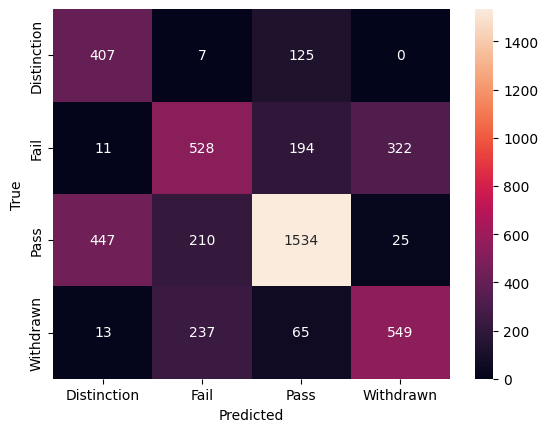

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Distinction','Fail','Pass','Withdrawn'],
            yticklabels=['Distinction','Fail','Pass','Withdrawn'])
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

grid = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.8}
Best CV accuracy: 0.6869583845089522


In [ ]:
# 5. Evaluate (example)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {scores.mean():.2%} (±{scores.std():.2%})")

Cross-validated Accuracy: 68.32% (±0.66%)


In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers, callbacks
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
from tensorflow.keras import regularizers, callbacks

model = Sequential([
    Dense(256, activation='relu',
          kernel_regularizer=regularizers.l2(0.001),
          input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu',
          kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert one-hot to class indices first
y_train_labels = np.argmax(y_train, axis=1)  # Converts [[0,1,0],[1,0,0]] to [1,0]

# Now compute weights
classes = np.unique(y_train_labels)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_labels)
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
# Custom optimizer configuration
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

# Class weighting
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Callbacks
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=200, batch_size=16, verbose=1)

Epoch 1/200
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7728 - loss: 0.5397 - val_accuracy: 0.7477 - val_loss: 0.5922
Epoch 2/200
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7714 - loss: 0.5377 - val_accuracy: 0.7482 - val_loss: 0.5916
Epoch 3/200
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7745 - loss: 0.5372 - val_accuracy: 0.7525 - val_loss: 0.5863
Epoch 4/200
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7742 - loss: 0.5352 - val_accuracy: 0.7533 - val_loss: 0.5878
Epoch 5/200
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7799 - loss: 0.5274 - val_accuracy: 0.7578 - val_loss: 0.5807
Epoch 6/200
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7727 - loss: 0.5270 - val_accuracy: 0.7528 - val_loss: 0.5847
Epoch 7/200
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7703 - loss: 0.5323 - val_accuracy: 0.7476 - val_loss: 0.5864
Epoch 8/200
2216/2216 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7783 - loss:

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

277/277 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test_labels, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='weighted')

In [ ]:
print(f"\nTest Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Test Accuracy: 76.81%
Precision: 0.7661
Recall: 0.7681
F1-Score: 0.7665


In [ ]:
model.save("ann_student_performance.h5")
print("\nModel saved as 'ann_student_performance.h5'")


Model saved as 'ann_student_performance.h5'


In [ ]:
# Save your model and scaler (run once)
import joblib
from tensorflow.keras.models import save_model

save_model(model, 'model/model.h5')  # Save Keras model
joblib.dump(scaler, 'model/scaler.pkl')  # Save your MinMaxScaler

['model/scaler.pkl']

In [ ]:
df.head()

,avg_score,weight,late_submission_count,total_engagement,date_registration,num_of_prev_attempts,studied_credits,assessment_count,activity_count,avg_days_late,...,imd_band_90-100%,imd_band_Unknown,age_band_0-35,age_band_1,age_band_2,age_band_35-55,disability_1,disability_N,disability_Y,final_result
0,0.618,0.435737,0.000000,0.464978,0.733333,0.0,0.0,0.0,0.315789,0.492903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,0.820,0.373041,0.000000,0.155604,0.184615,0.0,0.5,0.0,0.263158,0.498065,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,0.670,0.012539,0.000000,0.005364,0.758974,0.4,0.0,0.0,0.210526,0.445161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.900,0.025078,0.000000,0.019659,0.861538,0.0,0.0,0.0,0.421053,0.503226,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.468,0.435737,0.595745,0.083133,0.907692,0.0,0.0,0.0,0.315789,0.557419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
df.shape

(5828, 77)

In [ ]:
    'id_student', 'score', 'assessment_type', 'weight', 'gender', 'region',
    'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
    'studied_credits', 'disability', 'final_result', 'date_registration',
    'activity_type', 'sum_click', 'module_presentation_length', 'course_id',
    'days_late'

In [ ]:
df['studied_credits'].unique()

array([0.        , 0.5       , 0.16666667, ..., 0.01127806, 0.07607696,
       0.07638344])

In [ ]:
df['disability_1'].unique()

array([0.        , 1.        , 0.98536731, 0.52893455, 0.75839241,
       0.92997029, 0.04510068, 0.06151703, 0.708572  , 0.77943888,
       0.28385453, 0.33737872, 0.81165092, 0.02136871, 0.79551037,
       0.82683888, 0.86643867, 0.23480914, 0.6195803 , 0.97672524,
       0.0941089 , 0.35983178, 0.72885256, 0.83823579, 0.13533961,
       0.74620726, 0.06871283, 0.84336156, 0.72620869, 0.64336518,
       0.2172091 , 0.8088093 , 0.8132767 , 0.02709599, 0.27773307,
       0.9734678 , 0.81856456, 0.85988682, 0.08570119, 0.28095409,
       0.73773596, 0.27523323, 0.39226321, 0.69602062, 0.84610409,
       0.22381761, 0.50412426, 0.43426804, 0.89749027, 0.34548879,
       0.36147405, 0.36356975, 0.34129222, 0.86912634, 0.33313574,
       0.43298374, 0.19215406, 0.00575866, 0.60382731, 0.28187692,
       0.8030259 , 0.272624  , 0.57626175, 0.30999511, 0.96383962,
       0.49057787, 0.26638562, 0.25981321, 0.47601813, 0.68022778,
       0.92874327, 0.70717796, 0.66173249, 0.1561526 , 0.14430

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.shape

(5828, 77)

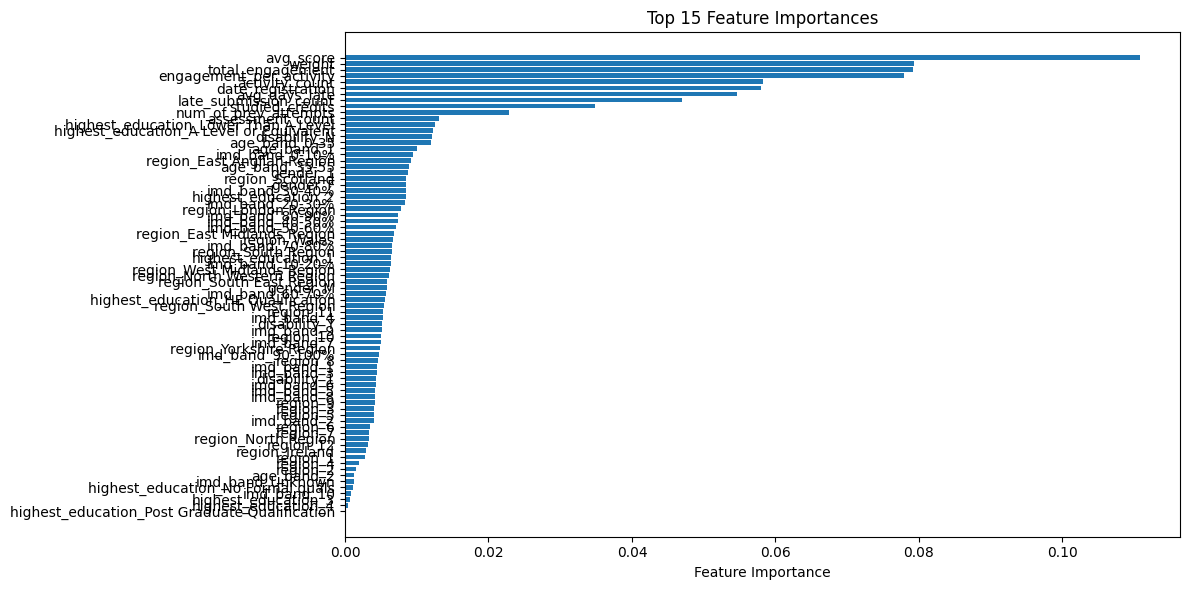

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate features and target
X = df.drop(columns=['final_result'])
y = df['final_result']

# Fit a model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(12, 6))
sorted_idx = importances.argsort()[::-1][:77]  # Top 15 features
plt.barh(range(len(sorted_idx)), importances[sorted_idx][::-1])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
#List top 10 important features whose value is greater than .05
top_features = feature_names[importances > 0.01]
print("Top 10 Important Features:")
print(top_features)

Top 10 Important Features:
Index(['avg_score', 'weight', 'late_submission_count', 'total_engagement',
       'date_registration', 'num_of_prev_attempts', 'studied_credits',
       'assessment_count', 'activity_count', 'avg_days_late',
       'engagement_per_activity', 'highest_education_A Level or Equivalent',
       'highest_education_Lower Than A Level', 'age_band_0-35',
       'disability_N'],
      dtype='object')
